# Mushroom Classification Using Different Classifiers

#### In this project, we will examine the data and create a machine learning algorithm that will detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.
#### The dataset used in this project is "mushrooms.csv" which contains 8124 instances of mushrooms with 23 features like cap-shape, cap-surface, cap-color, bruises, odor, etc. and is made available by UCI Machine Learning.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score,GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from catboost import CatBoostClassifier
warnings.filterwarnings("ignore")
%matplotlib inline

### Reading the csv file of the dataset

#### Pandas read_csv() function imports a CSV file (in our case, ‘mushrooms.csv’) to DataFrame format.

In [2]:
data = pd.read_csv("D:\Python Programs\Machine Learning\Projects\Mushroom Classification\mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Examining the Data

#### After importing the data, to learn more about the dataset, we'll use .info() and .describe() methods.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
data.shape

(8124, 23)

In [7]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Visualizing the count of edible and poisonous mushrooms

In [8]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 23 categorical features : ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


Poisonous: 3916, Edible: 4208


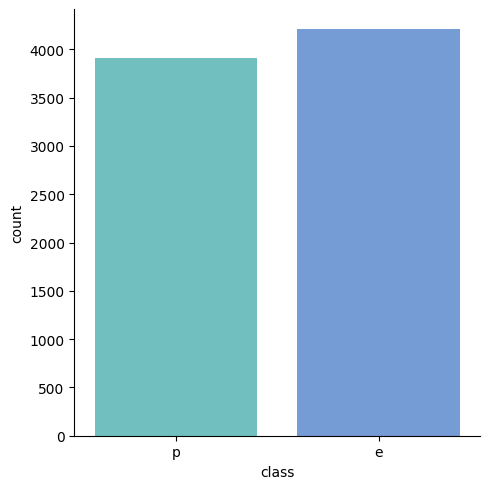

In [10]:
pois = data[data['class']=='p'].shape[0]
edib = data[data['class']=='e'].shape[0]
print("Poisonous: " + str(pois) + ", Edible: " + str(edib))
sns.catplot(data=data, x="class", kind="count", palette="winter_r", alpha=.6)
plt.show()

#### The dataset is balanced.

# Data Manipulation

#### The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.
#### This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ datatype. From the df.describe() method, we saw that our columns are of ‘object’ datatype. So we will have to change the type to ‘category’ before using this approach.

In [11]:
df = data.astype('category')

In [12]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

#### Preprocessing

In [15]:
mappings = list()
encoder = LabelEncoder()
for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index:label for index,label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [17]:
mappings  

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [18]:
''' classes = e edible ,p poisonous
cap-shape = 
b bell
c conical
x convex
f flat
k knobbed
s sunken

cap-surface
f fibrous
g grooves
y scaly
s smooth

cap-color
n brown
b buff
c cinnamon
g gray
r green
p pink
u purple
e red
w white
y yellow

bruises
t bruises f no

odor
a almond l anise c creosote y fishy f foul m musty n none p pungent s spicy

gill
-attachment
a attached d descending f free n notched

gill
-spacing
c close w crowded d distant

gill
-size
b broad n narrow

gill
-color
k black n brown b buff h chocolate g gray
r green
o orange
p pink
u purple
e red
w white
y yellow

stalk-shape
e enlarging
t tapering

stalk-root
b bulbous
c club
u cup
e equal
z rhizomorphs
r rooted
? missing

stalk-surface-above-ring
f fibrous
y scaly
k silky
s smooth

stalk-surface-below-ring
f fibrous
y scaly
k silky
s smooth

stalk-color-above-ring
n brown
b buff
c cinnamon
g gray
o orange
p pink
e red
w white
y yelllow

stalk-color-below-ring
n brown
b buff
c cinnamon
g gray
o orange
p pink
e red
w white
y yelllow
veil-type
p partial
u universal

veil-color
n brown
o orange
w white
y yellow

ring-number
n none
o one
t two

ring-type 
c cobwebby
e evanescent
f flaring
l large
n none
p pendant
s sheathing
z zone

spore-print-color
k black
n brown
b buff
h chocolate
r green
o orange
u purple
w white
y yellow

population
a abundant
c clustered
n numerous
s scattered
v several
y solitary

habitat
g grasses
l leaves
m meadows
p paths
u urban w waste d wood 
'''

' classes = e edible ,p poisonous\ncap-shape = \nb bell\nc conical\nx convex\nf flat\nk knobbed\ns sunken\n\ncap-surface\nf fibrous\ng grooves\ny scaly\ns smooth\n\ncap-color\nn brown\nb buff\nc cinnamon\ng gray\nr green\np pink\nu purple\ne red\nw white\ny yellow\n\nbruises\nt bruises f no\n\nodor\na almond l anise c creosote y fishy f foul m musty n none p pungent s spicy\n\ngill\n-attachment\na attached d descending f free n notched\n\ngill\n-spacing\nc close w crowded d distant\n\ngill\n-size\nb broad n narrow\n\ngill\n-color\nk black n brown b buff h chocolate g gray\nr green\no orange\np pink\nu purple\ne red\nw white\ny yellow\n\nstalk-shape\ne enlarging\nt tapering\n\nstalk-root\nb bulbous\nc club\nu cup\ne equal\nz rhizomorphs\nr rooted\n? missing\n\nstalk-surface-above-ring\nf fibrous\ny scaly\nk silky\ns smooth\n\nstalk-surface-below-ring\nf fibrous\ny scaly\nk silky\ns smooth\n\nstalk-color-above-ring\nn brown\nb buff\nc cinnamon\ng gray\no orange\np pink\ne red\nw white\ny

In [19]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [20]:
for i in df.columns:
    df[i] = df[i].apply(np.int64)

In [21]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [22]:
df.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

####  The column "veil-type" is 0 and not contributing to the data so we remove it.

In [23]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

In [24]:
df=df.drop(["veil-type"],axis=1)

In [42]:
#import openpyxl

In [43]:
#df.to_excel("Mushrooms_New.xlsx",index=False)#.reset_index(drop=True)

In [44]:
#df2 = pd.read_excel("Mushrooms_New.xlsx")
#df2.to_csv("Mushrooms_New.csv",index=False)

In [45]:
#df1 = pd.read_csv("D:\Python Programs\Machine Learning\Projects\Mushroom Classification\Mushrooms_New.csv")
#df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


### Check Skewness

In [25]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.

### Check Kurtosis

In [26]:
df.kurtosis()

class                       -1.995315
cap-shape                   -1.242413
cap-surface                 -1.277000
cap-color                   -0.836261
bruises                     -1.882986
odor                        -0.776605
gill-attachment             33.733746
gill-spacing                 1.386266
gill-size                   -1.318384
gill-color                  -1.286109
stalk-shape                 -1.926846
stalk-root                   0.089761
stalk-surface-above-ring     0.240407
stalk-surface-below-ring     0.229697
stalk-color-above-ring       2.502164
stalk-color-below-ring       2.364649
veil-color                  51.191438
ring-number                  8.345082
ring-type                   -1.708767
spore-print-color           -1.338594
population                   1.676558
habitat                     -0.258461
dtype: float64

* A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
* A distribution with kurtosis <3 (excess kurtosis <0 ) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
* A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

### Check Inter Quartile Range(IQR)

In [28]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

for col in numeric_features:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))

IQR of class : 1
IQR of cap-shape : 3
IQR of cap-surface : 3
IQR of cap-color : 5
IQR of bruises : 1
IQR of odor : 3
IQR of gill-attachment : 0
IQR of gill-spacing : 0
IQR of gill-size : 1
IQR of gill-color : 5
IQR of stalk-shape : 1
IQR of stalk-root : 1
IQR of stalk-surface-above-ring : 1
IQR of stalk-surface-below-ring : 1
IQR of stalk-color-above-ring : 1
IQR of stalk-color-below-ring : 1
IQR of veil-color : 0
IQR of ring-number : 0
IQR of ring-type : 4
IQR of spore-print-color : 5
IQR of population : 1
IQR of habitat : 2


### Check Range

In [29]:
for col in numeric_features:
    range = df[col].max() - df[col].min()
    print('range of %s : %d'%(col,range))

range of class : 1
range of cap-shape : 5
range of cap-surface : 3
range of cap-color : 9
range of bruises : 1
range of odor : 8
range of gill-attachment : 1
range of gill-spacing : 1
range of gill-size : 1
range of gill-color : 11
range of stalk-shape : 1
range of stalk-root : 4
range of stalk-surface-above-ring : 3
range of stalk-surface-below-ring : 3
range of stalk-color-above-ring : 8
range of stalk-color-below-ring : 8
range of veil-color : 3
range of ring-number : 2
range of ring-type : 4
range of spore-print-color : 8
range of population : 5
range of habitat : 6


## Univariate Analysis

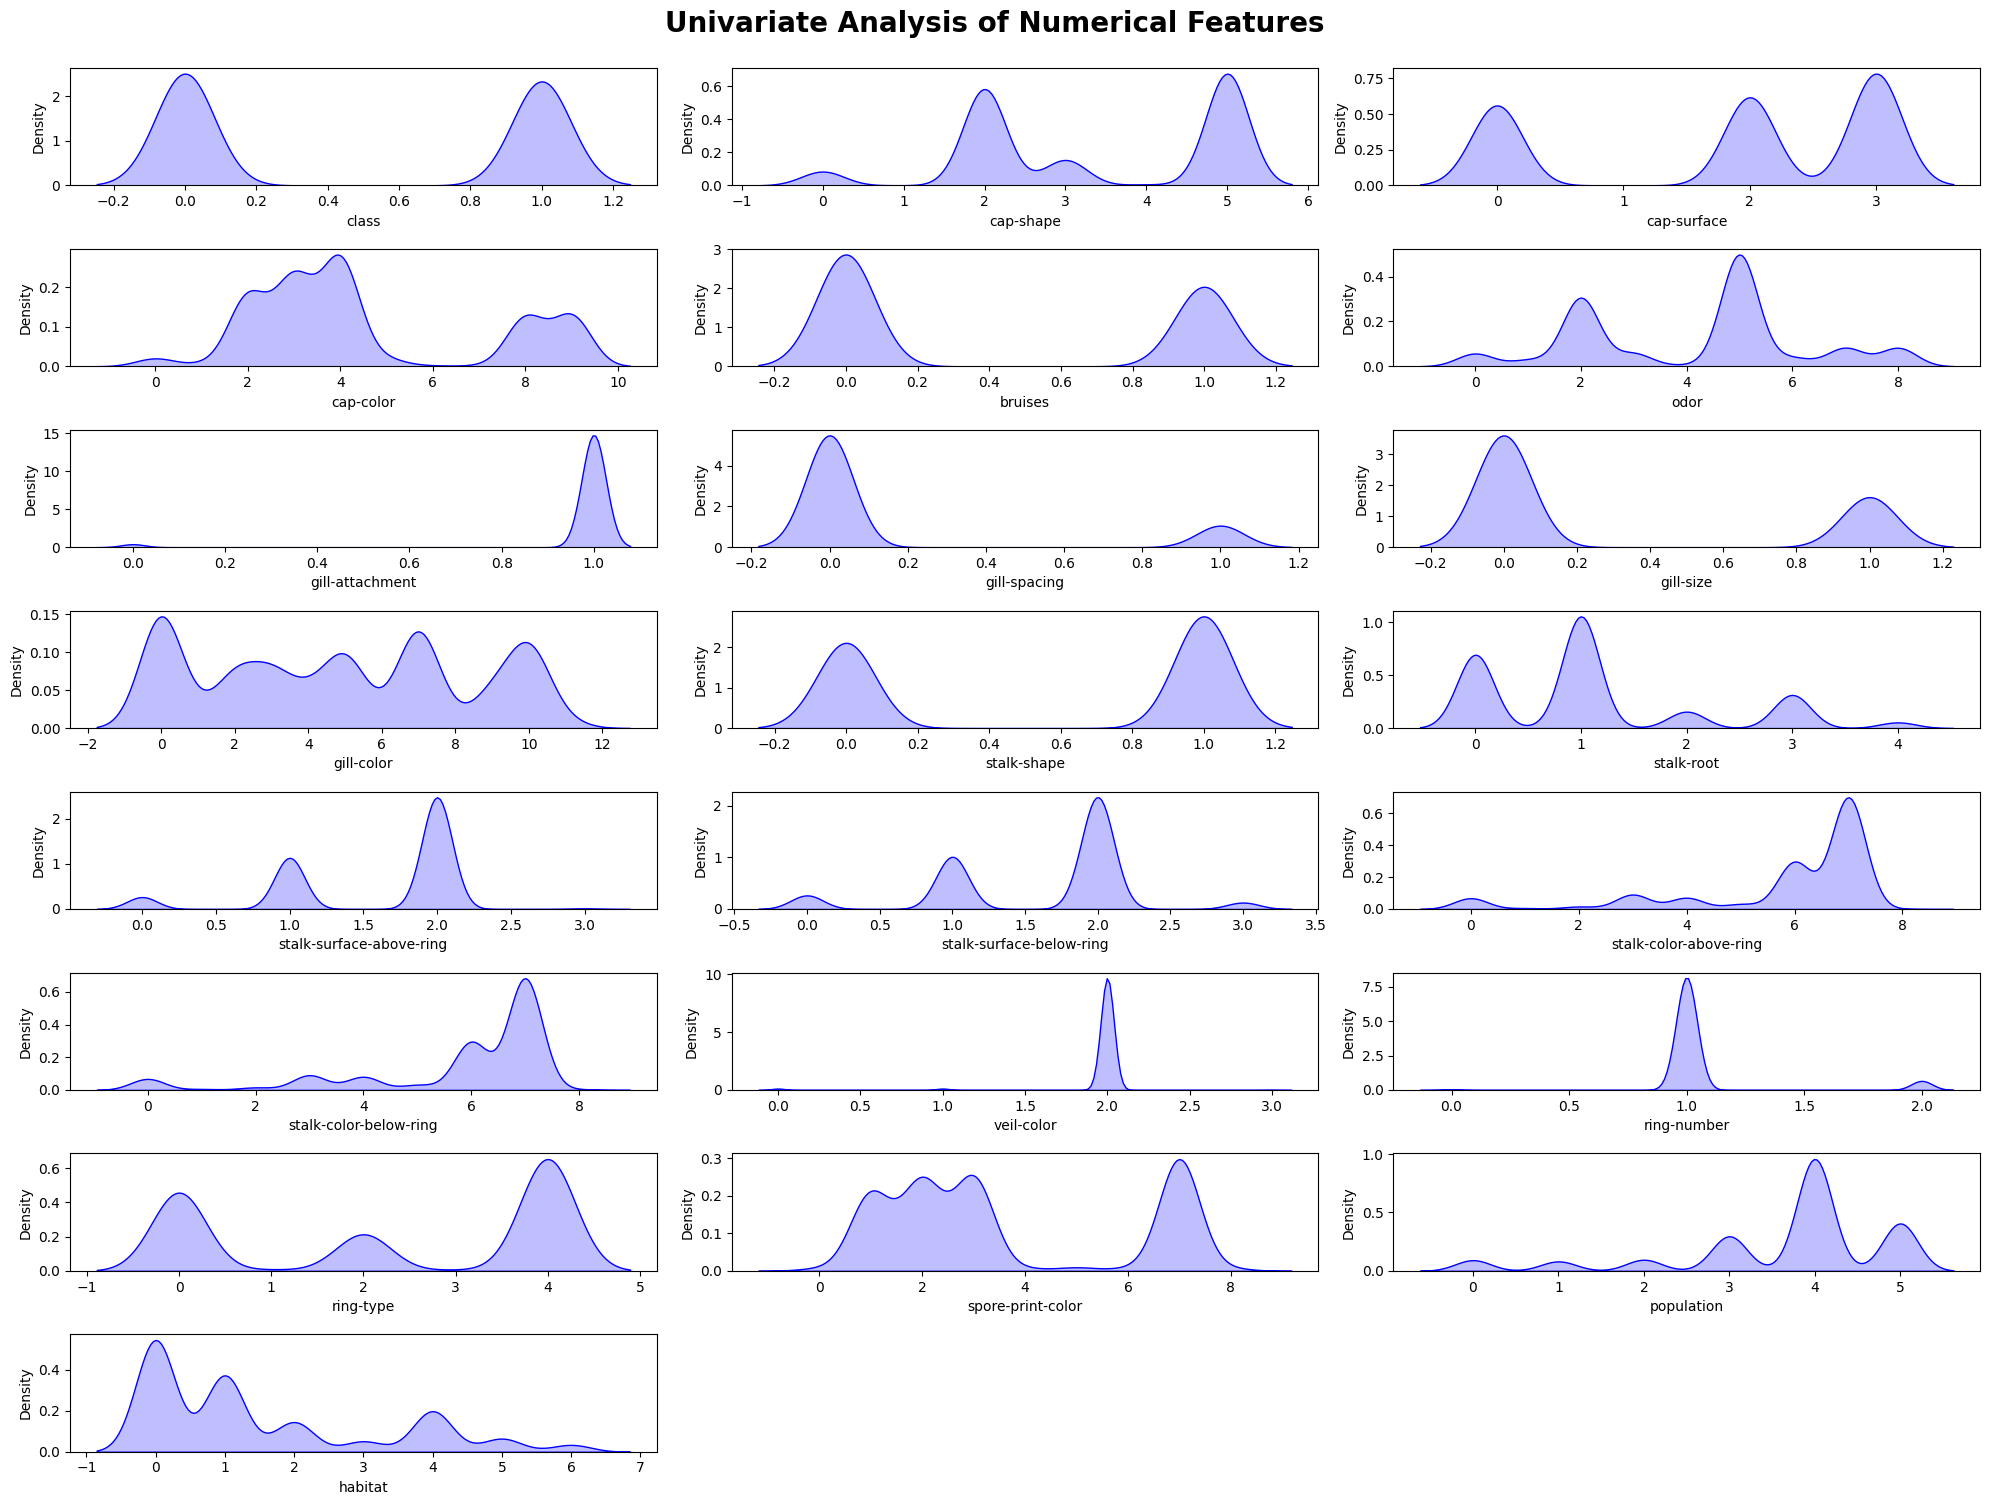

In [32]:
fig = plt.figure(figsize = (20,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',y=1.)
for i in enumerate(numeric_features):
    plt.subplot(8,3,i[0]+1)
    sns.kdeplot(x=df[numeric_features[i[0]]],shade='True',color='b')
    plt.xlabel(numeric_features[i[0]])
    plt.tight_layout()

**Observation:**
1. gill-attachment and population are Left Skewed or Negativaly Skewed.
2. gill-attachment has outliers.
3. habitat has Right Skewed or Positivaly Skewed.

## Multivariate Analysis

In [33]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


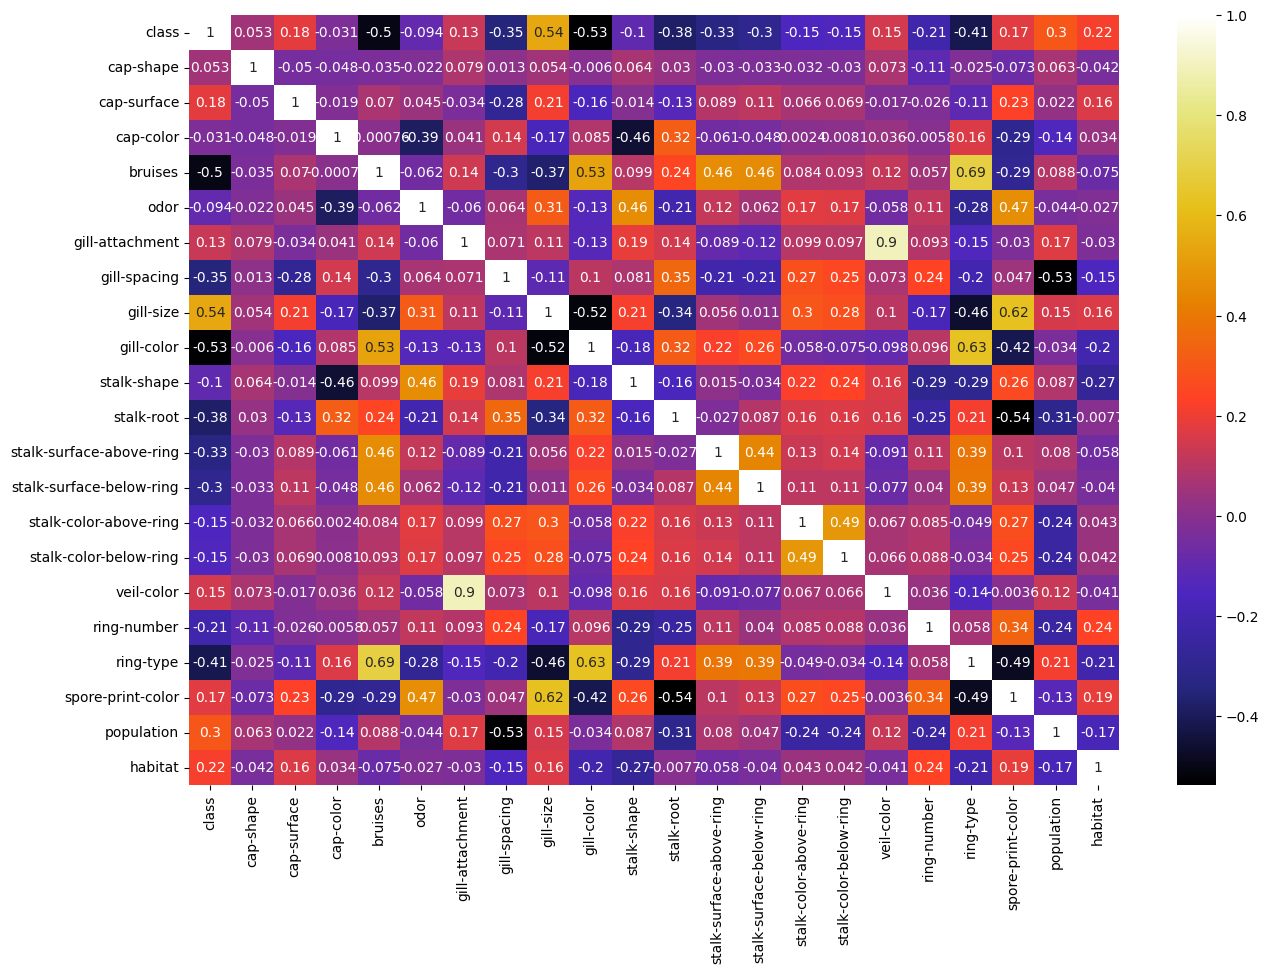

In [34]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**Observation:**
1. Class is 0.54 with gill size.
2. bruises is 0.53 with gill color.
3. bruises is 0.46 with stalk surface above ring and below ring.
4. ring type is 0.49 with stalk surface above ring and below ring.
5. gill attachment is 0.9 with veil color.
6. bruises is 0.69 with ring type.
7. ring type is 0.63 with gill color.
8. gill size is 0.62 with spore print color.

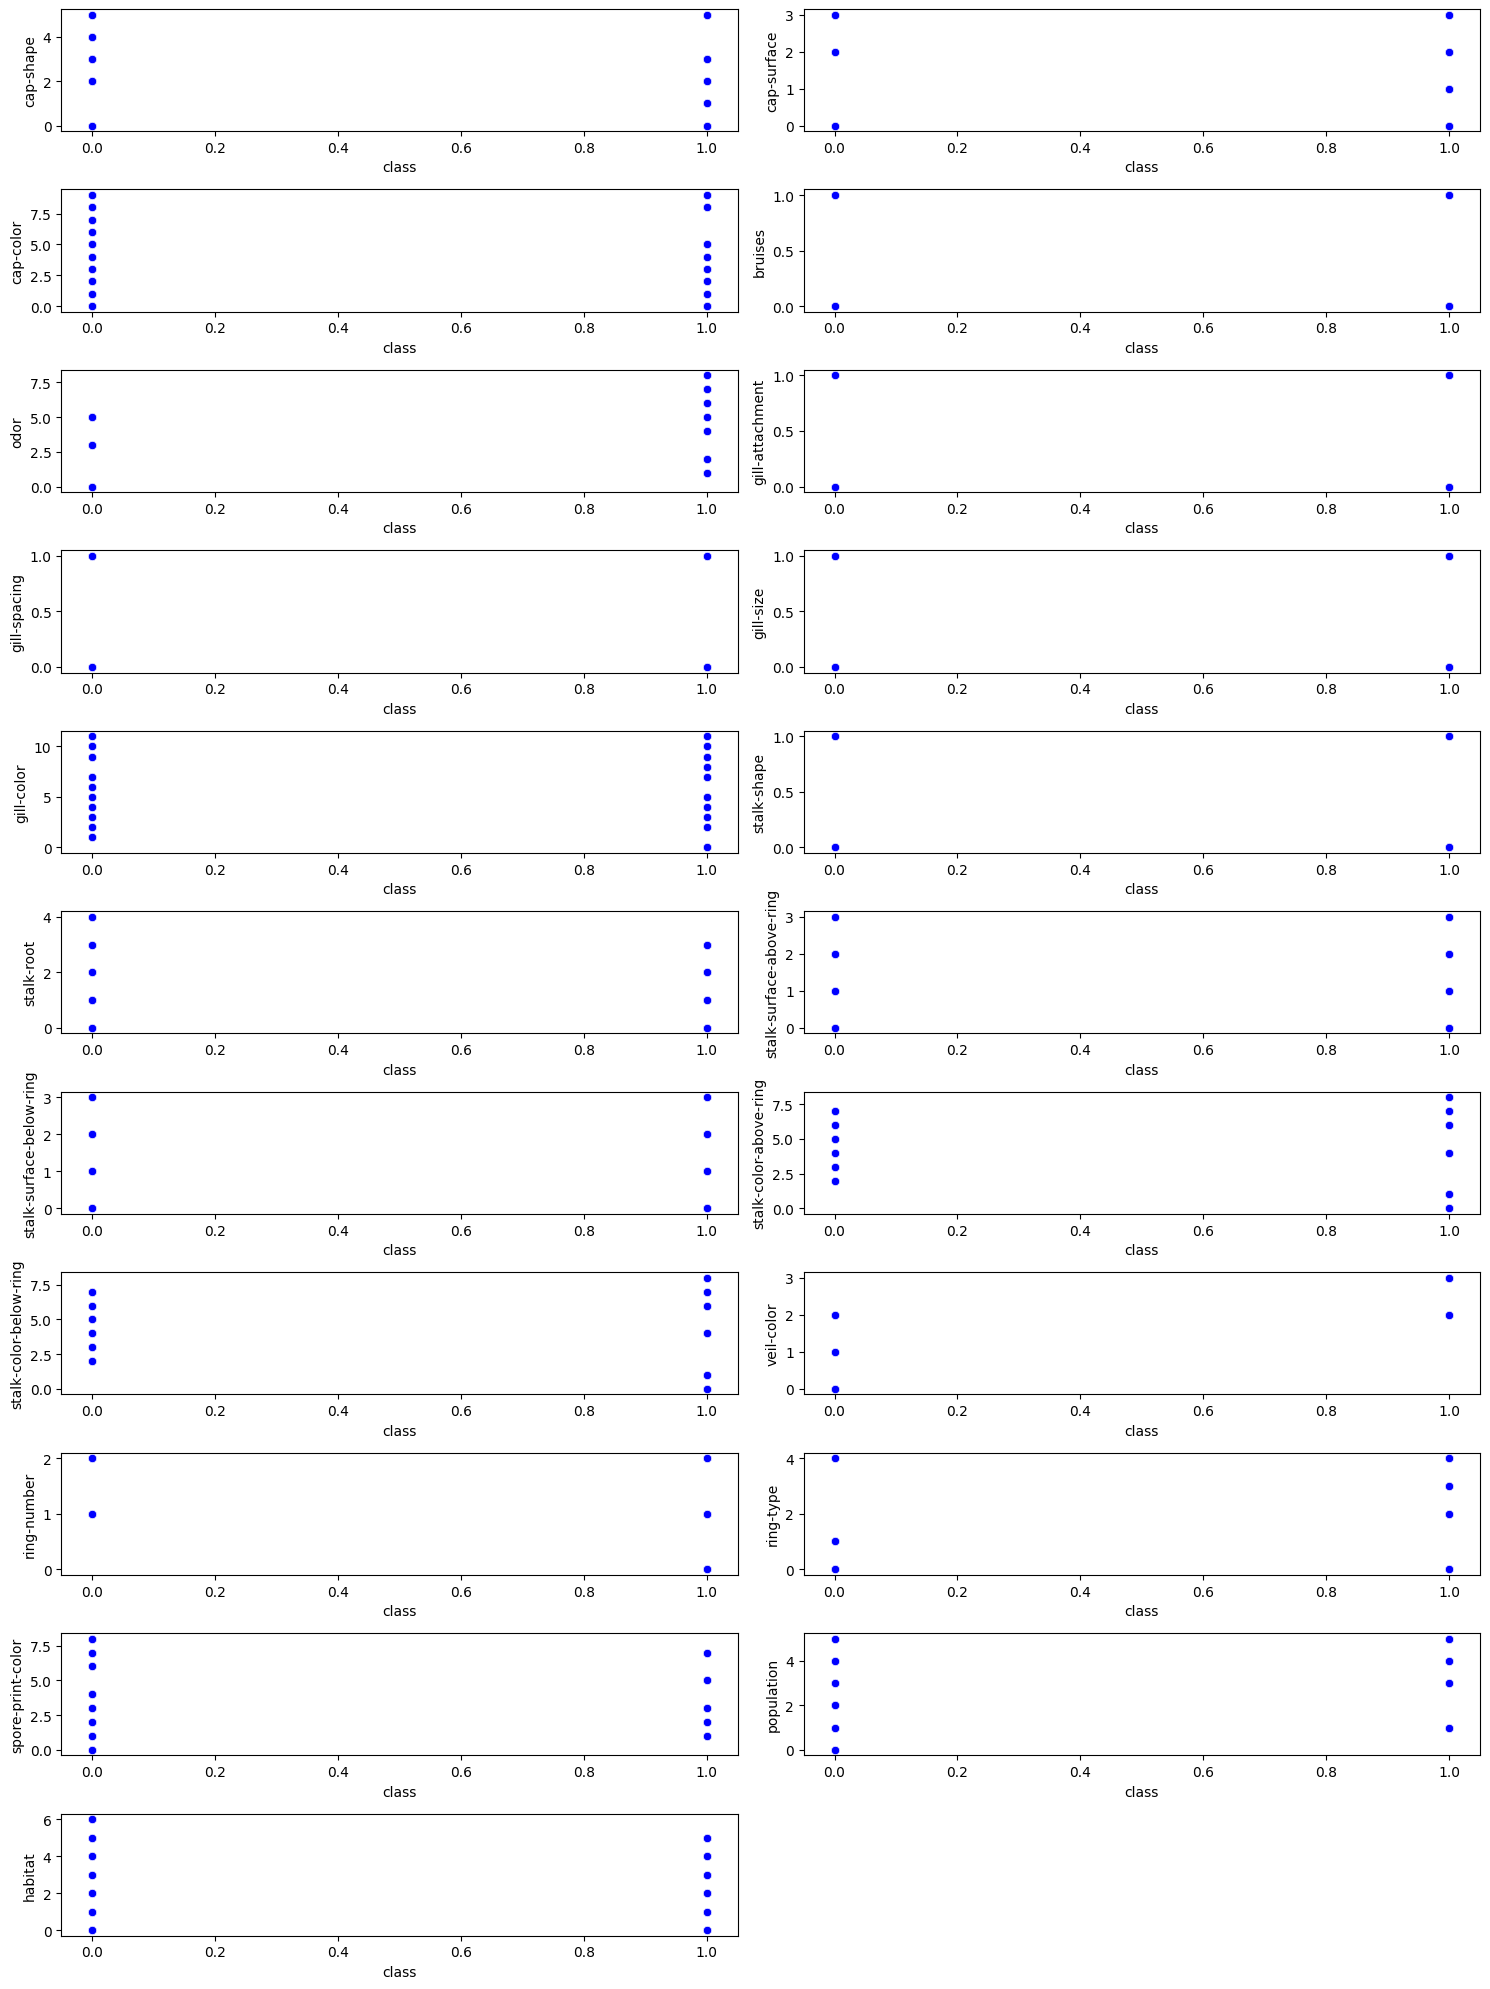

In [54]:
lst1 = df.drop('class',axis=1)
fig = plt.figure(figsize=(15, 20))

for i in enumerate(lst1):
    ax = plt.subplot(11, 2, i[0]+1)
    sns.scatterplot(data= df ,x='class', y=lst1[i[1]], color='b')
    plt.tight_layout()

### Check the Outliers

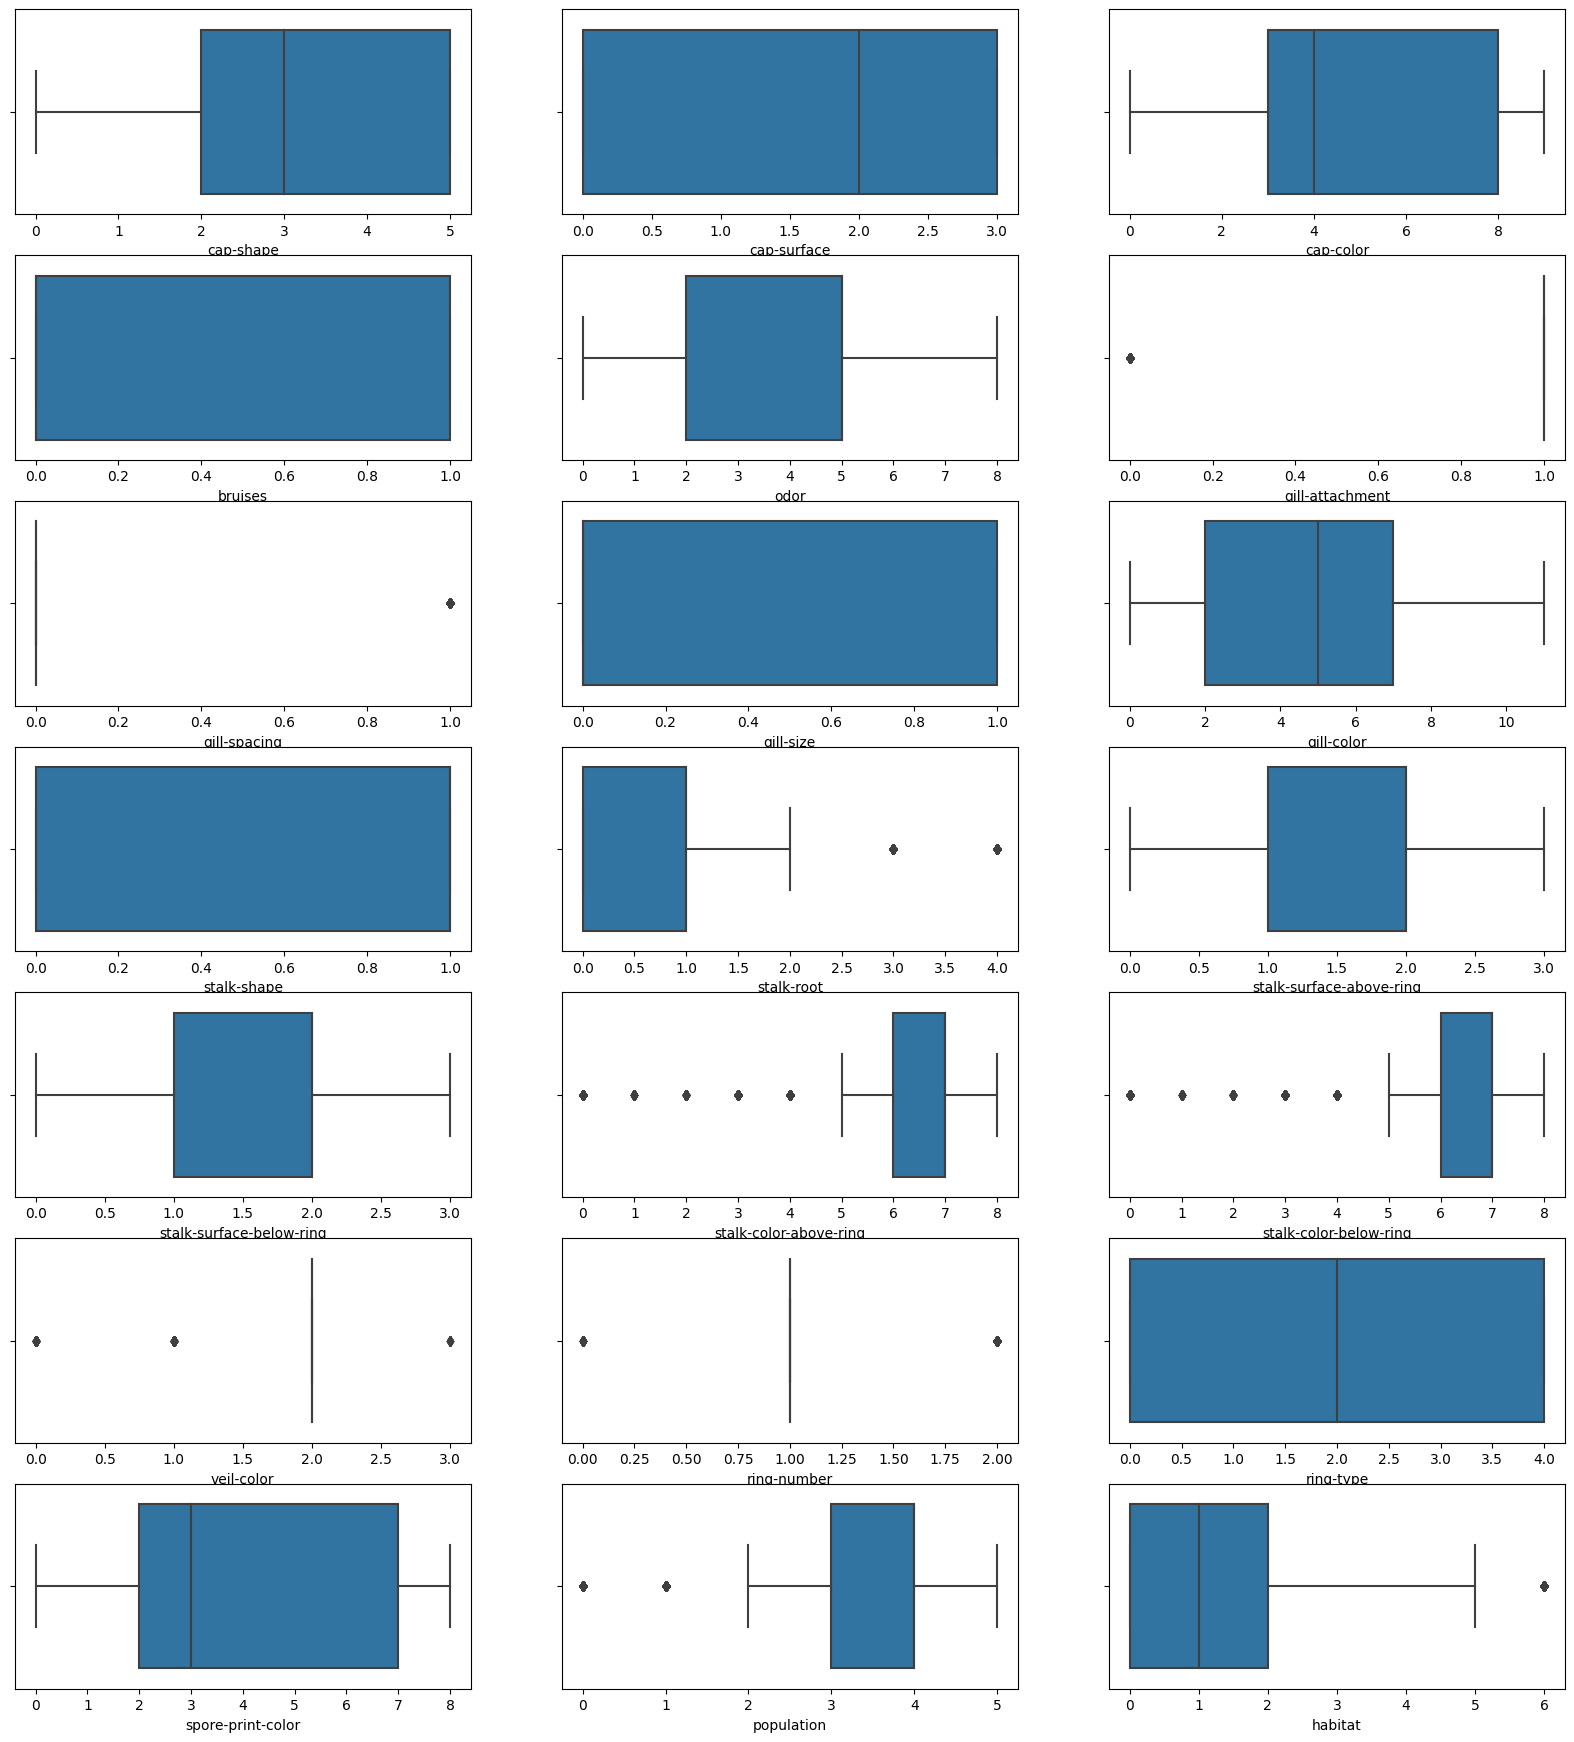

In [55]:
plt.figure(figsize=(20,25))
for i in enumerate(lst1):
    plt.subplot(8,3,i[0]+1)
    sns.boxplot(data=df,x=lst1[i[1]])

## Countplot

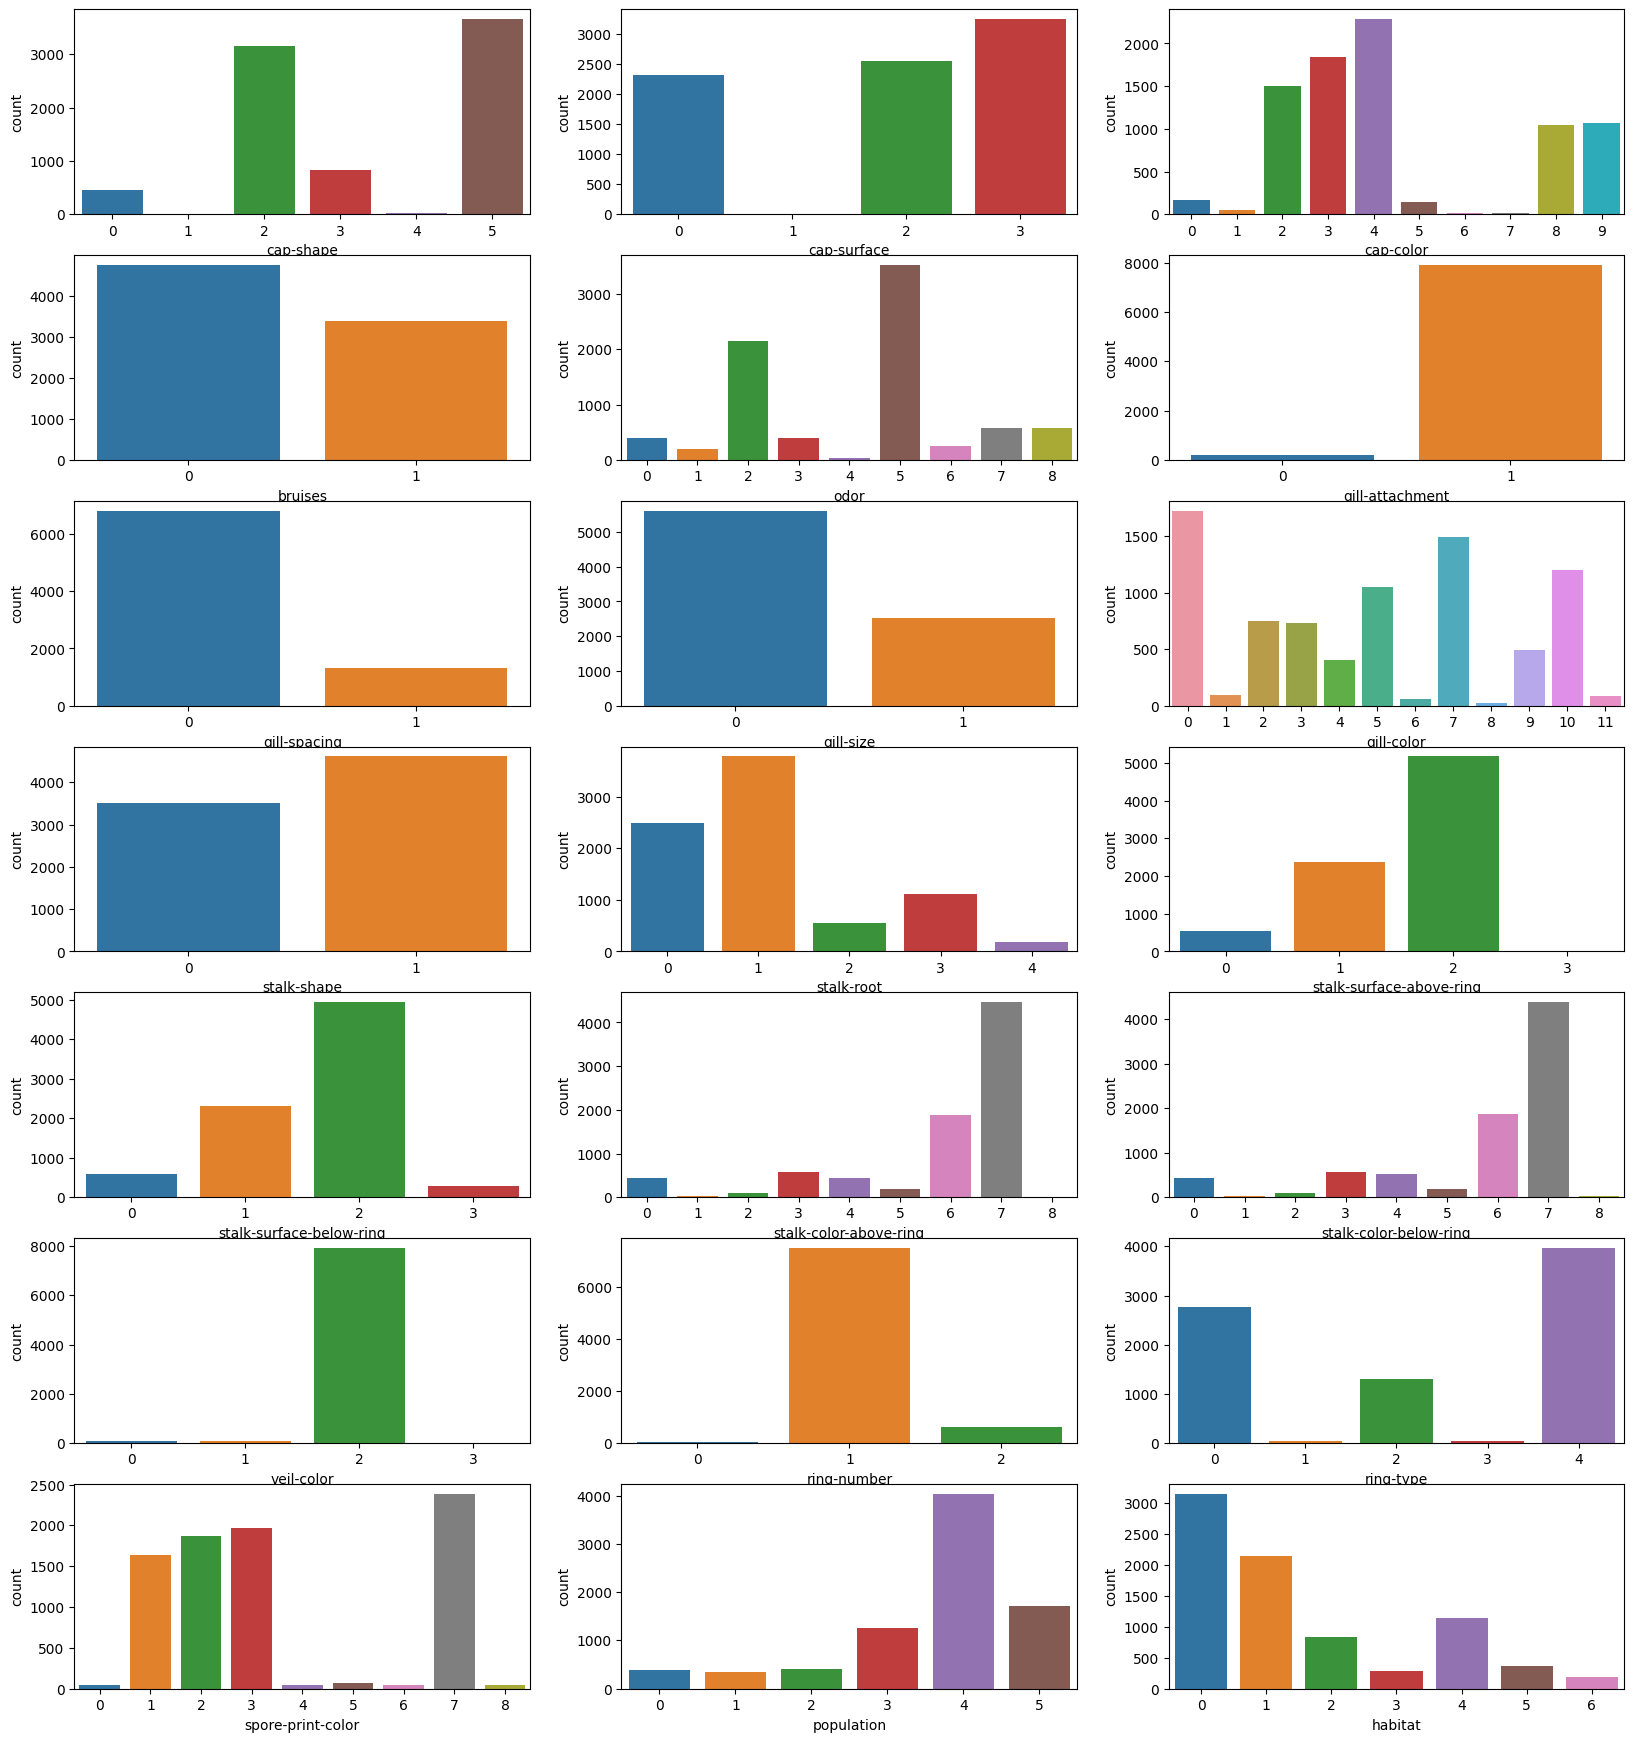

In [114]:
plt.figure(figsize=(20,25))
for i in enumerate(lst1):
    plt.subplot(8,3,i[0]+1)
    sns.countplot(data=df,x=lst1[i[1]])

### Quick look at the characteristics of the data

#### The violin plot below represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification.

[Text(0, 0, 'cap-shape'),
 Text(1, 0, 'cap-surface'),
 Text(2, 0, 'cap-color'),
 Text(3, 0, 'bruises'),
 Text(4, 0, 'odor'),
 Text(5, 0, 'gill-attachment'),
 Text(6, 0, 'gill-spacing'),
 Text(7, 0, 'gill-size'),
 Text(8, 0, 'gill-color'),
 Text(9, 0, 'stalk-shape'),
 Text(10, 0, 'stalk-root'),
 Text(11, 0, 'stalk-surface-above-ring'),
 Text(12, 0, 'stalk-surface-below-ring'),
 Text(13, 0, 'stalk-color-above-ring'),
 Text(14, 0, 'stalk-color-below-ring'),
 Text(15, 0, 'veil-color'),
 Text(16, 0, 'ring-number'),
 Text(17, 0, 'ring-type'),
 Text(18, 0, 'spore-print-color'),
 Text(19, 0, 'population'),
 Text(20, 0, 'habitat')]

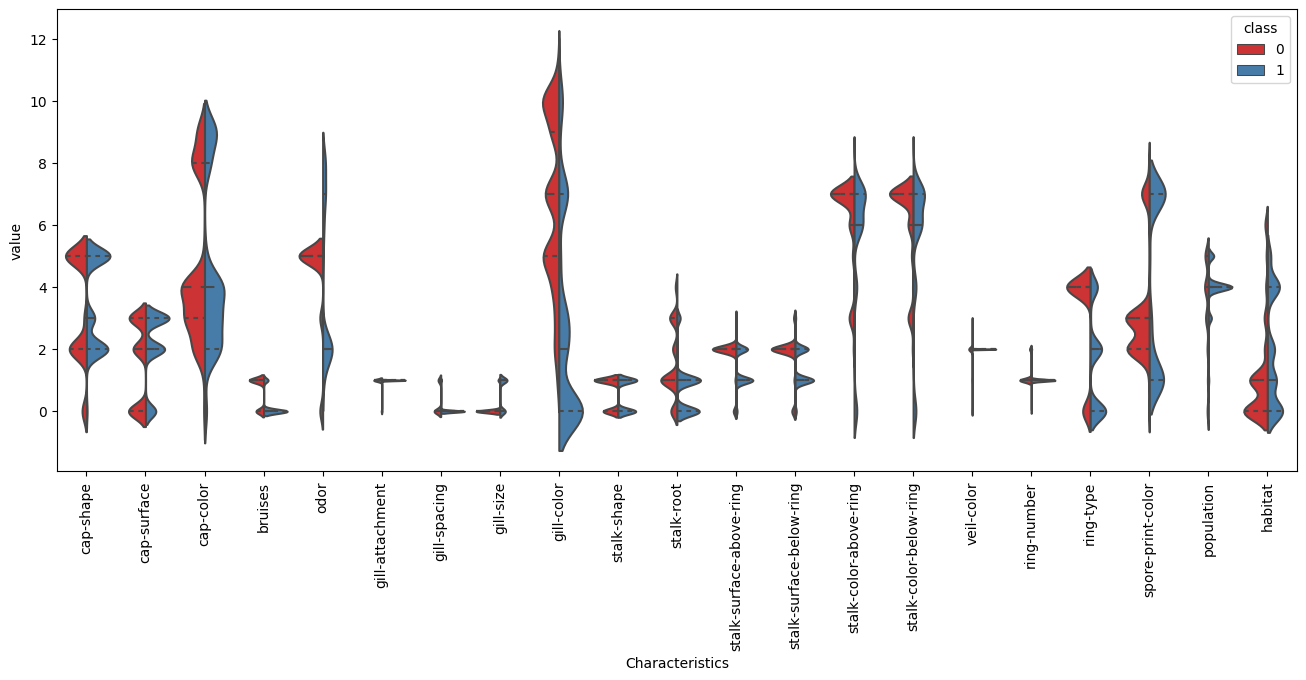

In [56]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns))
#plt.savefig("violinplot.png", format='png', dpi=900, bbox_inches='tight')

### Plot  distribution of all Independent Numerical variables

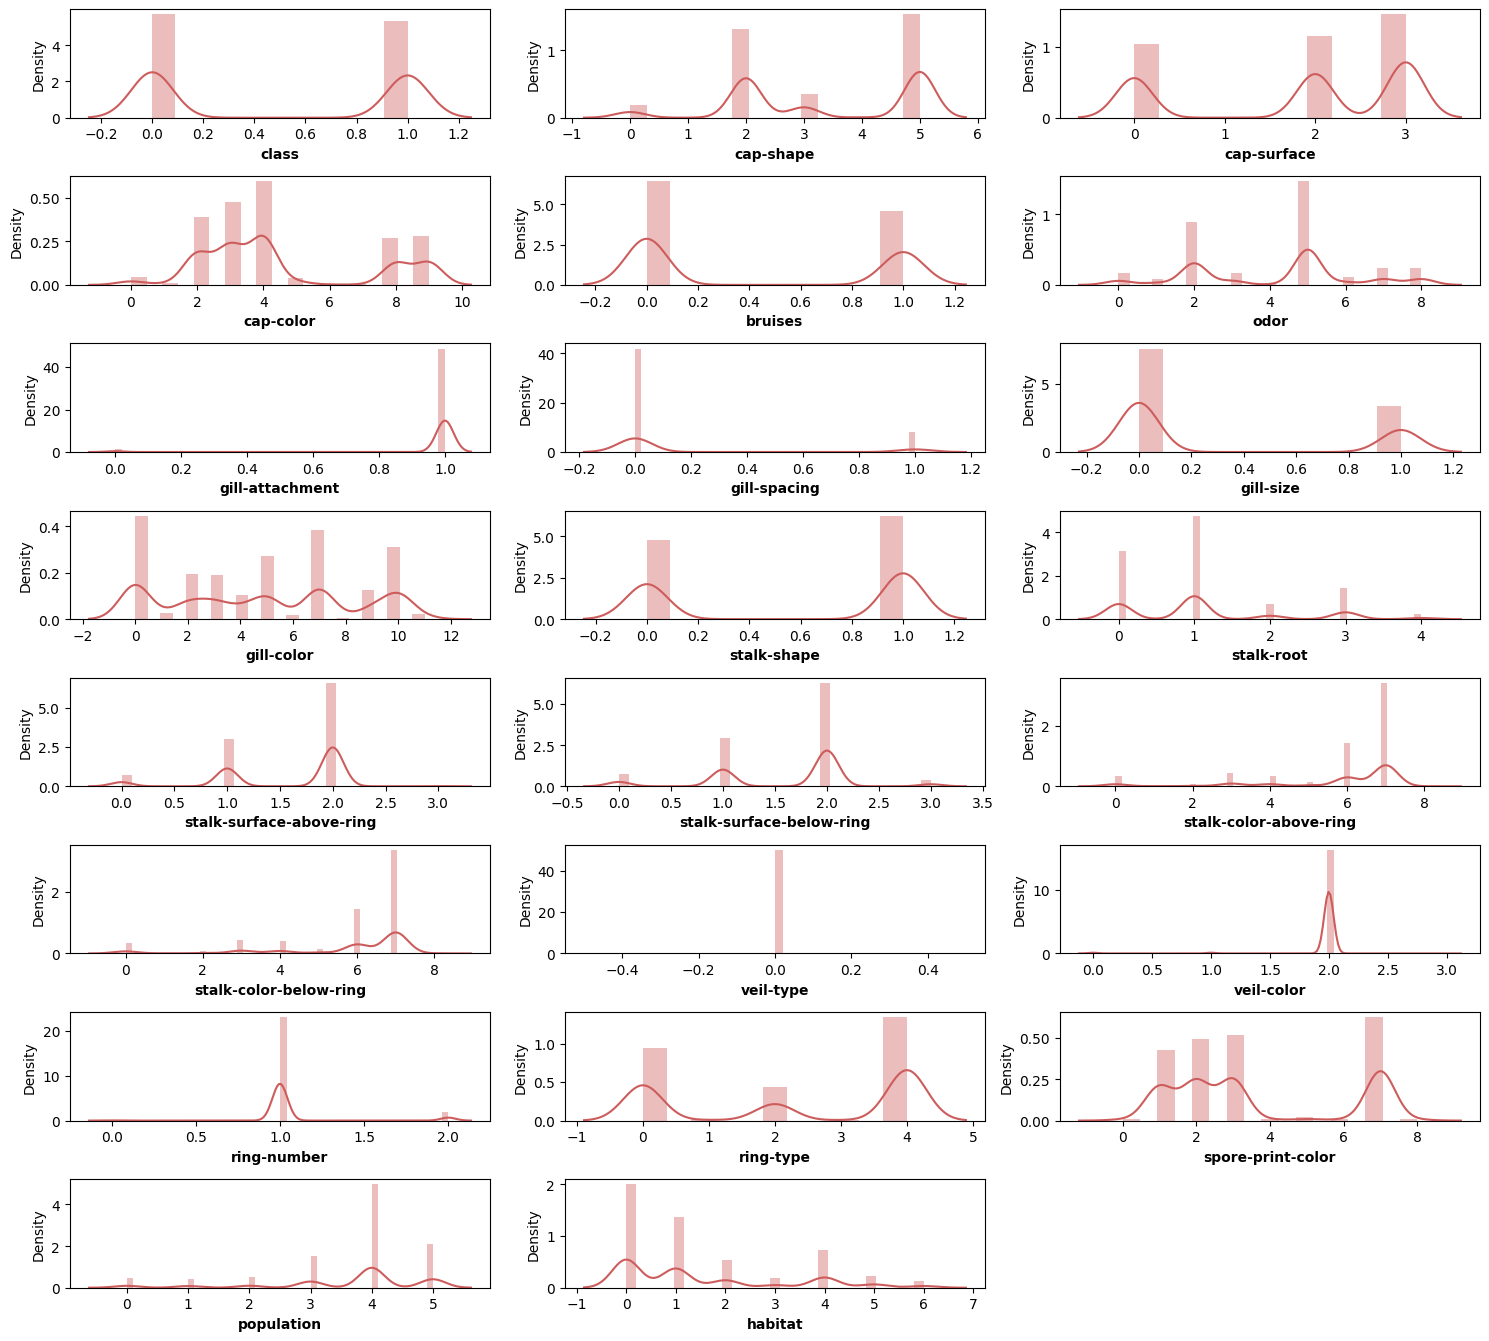

In [25]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=data[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [57]:
X = df.drop('class',axis=1)
print(X.shape)

(8124, 21)


In [60]:
Y = df['class']
Y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)   

# Classification Methods

## 1. Decision Tree Classification

In [63]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Feature importance

#### By all methods examined before the feature that is most important is "gill-color".

### Predicting and estimating the result

In [65]:
y_pred_dt = dt.predict(X_test)

In [66]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [67]:
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [70]:
print("MSE: ",mean_squared_error(y_test,y_pred_dt))
print("MAE: ",mean_absolute_error(y_test,y_pred_dt)) 
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_dt)))
score = r2_score(y_test,y_pred_dt)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


### Confusion Matrix for Decision Tree Classifier

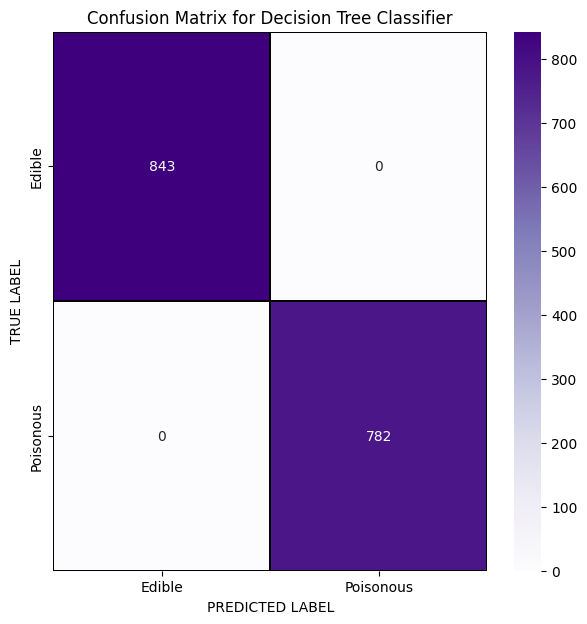

In [71]:
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 2. Logistic Regression Classification

In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 94.77%


#### Classification report of Logistic Regression Classifier

In [73]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [74]:
print("MSE: ",mean_squared_error(y_test,y_pred_lr))
print("MAE: ",mean_absolute_error(y_test,y_pred_lr)) 
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
score = r2_score(y_test,y_pred_lr)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  0.052307692307692305
MAE:  0.052307692307692305
RMSE:  0.22870874995874624
R Square:  0.7904739800918047
Adjusted R Square:  0.7877290977349288


### Confusion Matrix for Logistic Regression Classifier

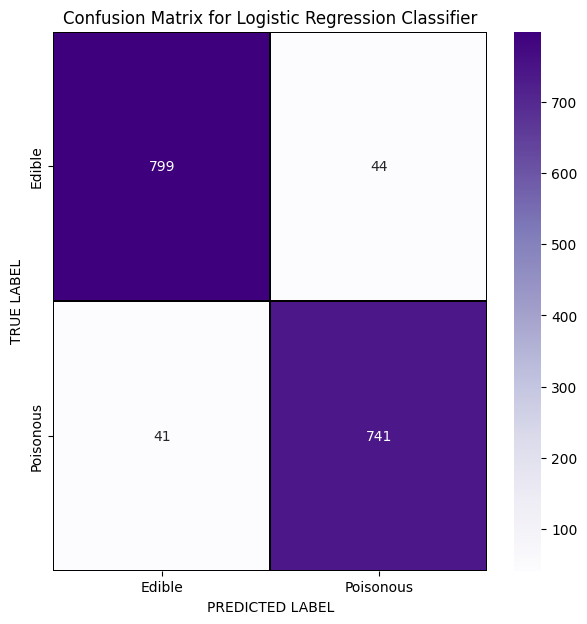

In [75]:
cm = confusion_matrix(y_test, y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 3. KNN Classification

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(knn.score(X_test, y_test)*100,2)))

Test Accuracy: 99.63%


#### Classification report of KNN Classifier

In [80]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [81]:
print("MSE: ",mean_squared_error(y_test,y_pred_knn))
print("MAE: ",mean_absolute_error(y_test,y_pred_knn)) 
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_knn)))
score = r2_score(y_test,y_pred_knn)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  0.0036923076923076922
MAE:  0.0036923076923076922
RMSE:  0.060764362025019995
R Square:  0.9852099280064803
Adjusted R Square:  0.9850161716048185


### Confusion Matrix for KNN Classifier

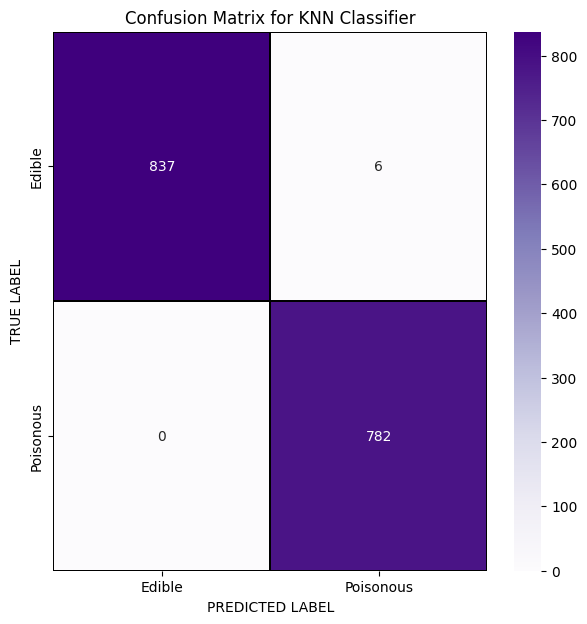

In [82]:
cm = confusion_matrix(y_test, y_pred_knn)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 4. SVM Classification

In [83]:
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


#### Classification report of SVM Classifier

In [84]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [85]:
print("MSE: ",mean_squared_error(y_test,y_pred_svm))
print("MAE: ",mean_absolute_error(y_test,y_pred_svm)) 
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_svm)))
score = r2_score(y_test,y_pred_svm)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


### Confusion Matrix for SVM Classifier

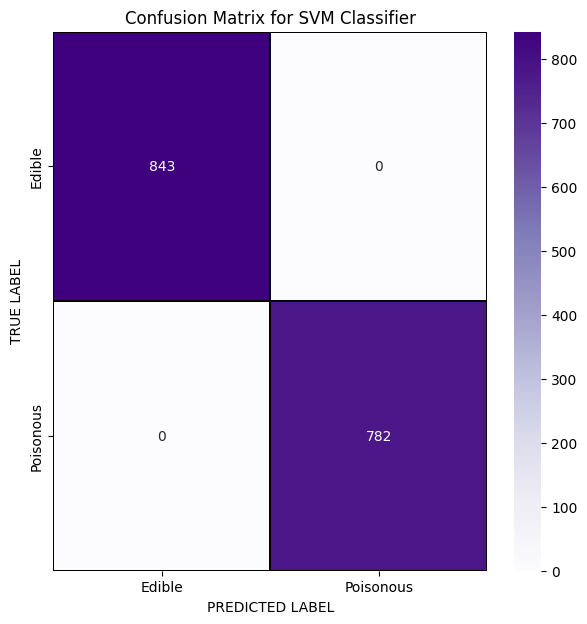

In [86]:
cm = confusion_matrix(y_test, y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 5. Naive Bayes Classification

In [87]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 92.18%


#### Classification report of Naive Bayes Classifier

In [88]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



In [89]:
print("MSE: ",mean_squared_error(y_test,y_pred_nb))
print("MAE: ",mean_absolute_error(y_test,y_pred_nb)) 
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_nb)))
score = r2_score(y_test,y_pred_nb)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  0.07815384615384616
MAE:  0.07815384615384616
RMSE:  0.2795600939938427
R Square:  0.6869434761371669
Adjusted R Square:  0.6828422989686582


### Confusion Matrix for Naive Bayes Classifier

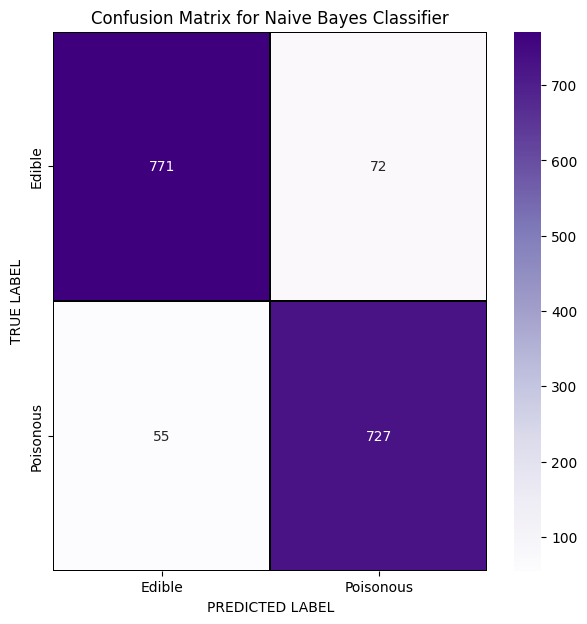

In [90]:
cm = confusion_matrix(y_test, y_pred_nb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 6. Random Forest Classification

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


#### Classification report of Random Forest Classifier

In [92]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [93]:
print("MSE: ",mean_squared_error(y_test,y_pred_rf))
print("MAE: ",mean_absolute_error(y_test,y_pred_rf)) 
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_rf)))
score = r2_score(y_test,y_pred_rf)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


### Confusion Matrix for Random Forest Classifier

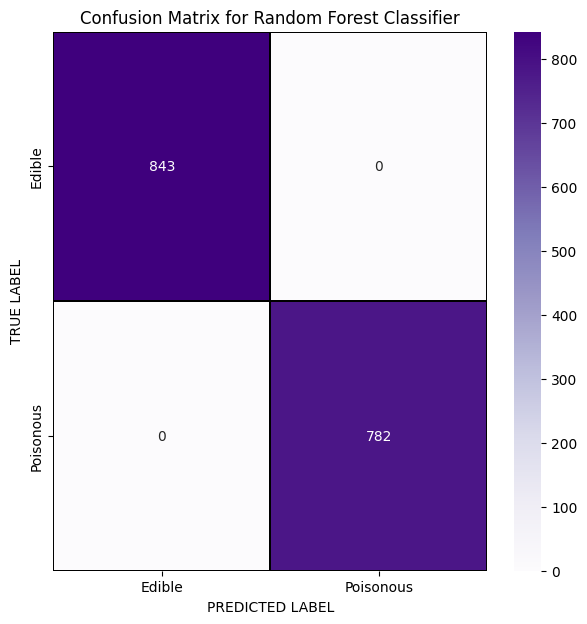

In [94]:
cm = confusion_matrix(y_test, y_pred_rf)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 7. XGBoost Classification

In [96]:
xb = XGBClassifier()
xb = xb.fit(X_train, y_train)
y_pred_xb = xb.predict(X_test)
print("Test Accuracy: {}%".format(round(xb.score(X_test, y_test)*100,2)))

Test Accuracy: 100.0%


#### Classification report of XGBoost Classifier

In [97]:
print("XGBoost Classifier report: \n\n", classification_report(y_test, y_pred_xb))

XGBoost Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [98]:
print("MSE: ",mean_squared_error(y_test,y_pred_xb))
print("MAE: ",mean_absolute_error(y_test,y_pred_xb)) 
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_xb)))
score = r2_score(y_test,y_pred_xb)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


### Confusion Matrix for XGBoost Classifier

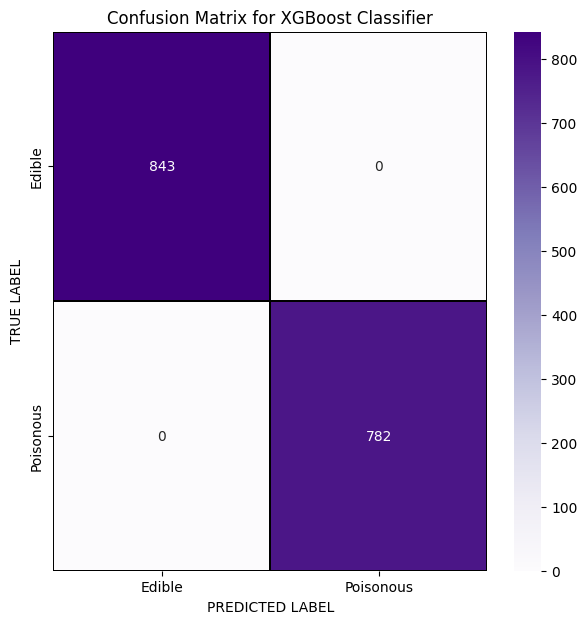

In [99]:
cm = confusion_matrix(y_test, y_pred_xb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBoost Classifier')
#plt.savefig("xbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 8. Gradient Boost Classifier

In [100]:
gb = GradientBoostingClassifier()
gb = gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Test Accuracy: {}%".format(round(gb.score(X_test, y_test)*100,2)))

Test Accuracy: 100.0%


#### Classification report of GradientBoost Classifier

In [101]:
print("Gradient Boost Classifier report: \n\n", classification_report(y_test, y_pred_gb))

Gradient Boost Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [102]:
print("MSE: ",mean_squared_error(y_test,y_pred_gb))
print("MAE: ",mean_absolute_error(y_test,y_pred_gb)) 
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_gb)))
score = r2_score(y_test,y_pred_gb)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


### Confusion Matrix for Gradient Boost Classifier

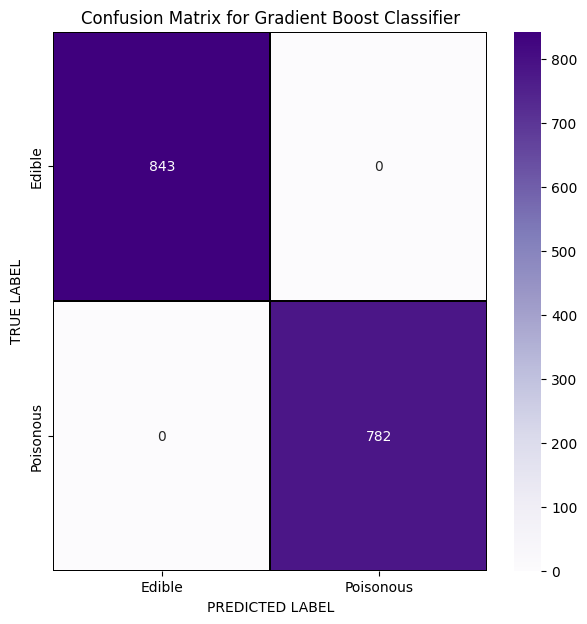

In [103]:
cm = confusion_matrix(y_test, y_pred_gb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boost Classifier')
#plt.savefig("gbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 9. Cat Boost Classification

In [104]:
cb = CatBoostClassifier(verbose=False)
cb = cb.fit(X_train, y_train)
y_pred_cb = cb.predict(X_test)
print("Test Accuracy: {}%".format(round(cb.score(X_test, y_test)*100,2)))

Test Accuracy: 100.0%


#### Classification report of Cat Boost Classifier

In [105]:
print("Cat Boost Classifier report: \n\n", classification_report(y_test, y_pred_cb))

Cat Boost Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [106]:
print("MSE: ",mean_squared_error(y_test,y_pred_cb))
print("MAE: ",mean_absolute_error(y_test,y_pred_cb)) 
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_cb)))
score = r2_score(y_test,y_pred_cb)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


### Confusion Matrix for Cat Boost Classifier

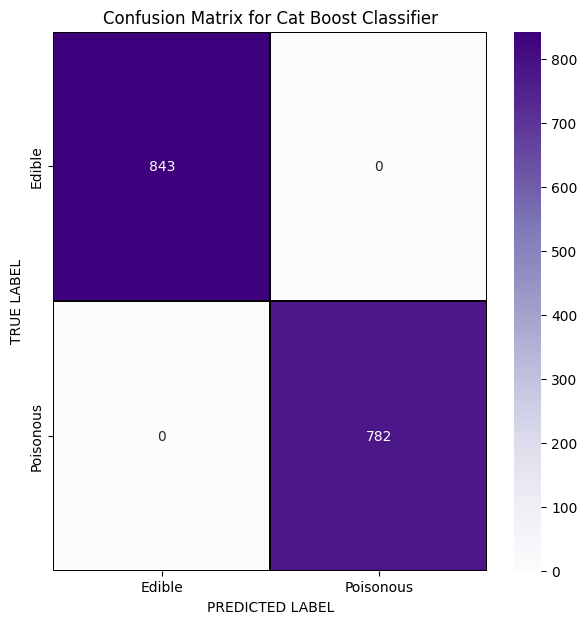

In [107]:
cm = confusion_matrix(y_test, y_pred_cb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Cat Boost Classifier')
#plt.savefig("cbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

# 10. AdaBoost Classifier

In [108]:
adb = AdaBoostClassifier()
adb = adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)
print("Test Accuracy: {}%".format(round(adb.score(X_test, y_test)*100,2)))

Test Accuracy: 100.0%


#### Classification report of AdaBoost Classifier

In [109]:
print("Cat Boost Classifier report: \n\n", classification_report(y_test, y_pred_adb))

Cat Boost Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [110]:
print("MSE: ",mean_squared_error(y_test,y_pred_adb))
print("MAE: ",mean_absolute_error(y_test,y_pred_adb)) 
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_adb)))
score = r2_score(y_test,y_pred_adb)
print("R Square: ",score)
print("Adjusted R Square: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  0.0
MAE:  0.0
RMSE:  0.0
R Square:  1.0
Adjusted R Square:  1.0


### Confusion Matrix for  AdaBoost Classifier

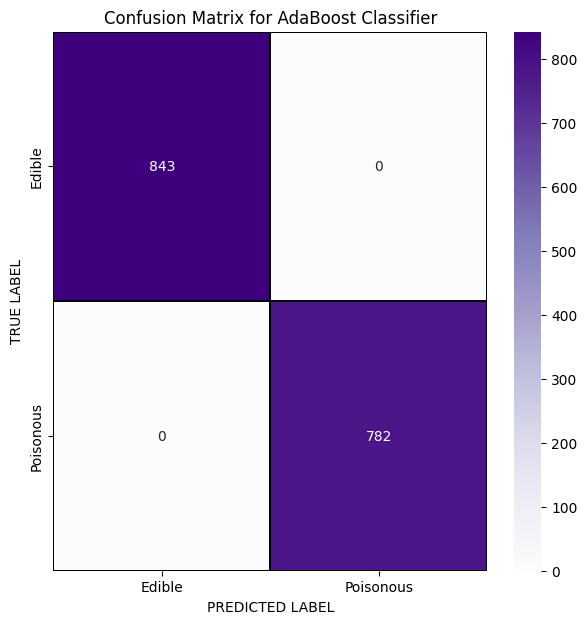

In [111]:
cm = confusion_matrix(y_test, y_pred_adb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoost Classifier')
#plt.savefig("adbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [112]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Test Accuracy"]
pt.add_row(["DecisionTreeClassifier","100"])
pt.add_row(["LogisticRegression","94.77"])
pt.add_row(["KNeighborsClassifier","99.63"])
pt.add_row(["SVC","100"])
pt.add_row(["GaussianNB","92.18"])
pt.add_row(["RandomForestClassifier","100"])
pt.add_row(["XGBClassifier","100"])
pt.add_row(["GradientBoostingClassifier","100"])
pt.add_row(["CatBoostClassifier","100"])
pt.add_row(["AdaBoostClassifier","100"])
print(pt)

+----------------------------+---------------+
|           Model            | Test Accuracy |
+----------------------------+---------------+
|   DecisionTreeClassifier   |      100      |
|     LogisticRegression     |     94.77     |
|    KNeighborsClassifier    |     99.63     |
|            SVC             |      100      |
|         GaussianNB         |     92.18     |
|   RandomForestClassifier   |      100      |
|       XGBClassifier        |      100      |
| GradientBoostingClassifier |      100      |
|     CatBoostClassifier     |      100      |
|     AdaBoostClassifier     |      100      |
+----------------------------+---------------+


# Conclusion


#### From the confusion matrix, we saw that our train and test data is balanced.
#### Most of the classification methods hit 100% accuracy with this dataset.

# Save Model

In [113]:
#import pickle
#pickle.dump(nb, open('model_nb.pkl','wb'))